<a href="https://colab.research.google.com/github/Julian-Palacios/PMEF/blob/main/01_Viga_Quad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request 
urllib.request.urlretrieve("https://raw.githubusercontent.com/Julian-Palacios/PMEF/main/FEM_funciones_aux.py", "FEM_funciones_aux.py")

('FEM_funciones_aux.py', <http.client.HTTPMessage at 0x7f9dc995e990>)

In [2]:
from FEM_funciones_aux import *
# from DIN_funciones import *
import time
from scipy.sparse.linalg import spsolve, eigsh
import matplotlib.pyplot as plt
from scipy.linalg import eigh

<p>Se realizan las configuraciones iniciales del modelo que se analizará</p>

In [3]:
# ProblemData (SpaceDim, 'pde')
ProblemData(2, "Elasticidad")

# ElementData (dof, nodes, noInt, 'type')
ElementData(2, 4, 4, "Quad4")

# MassData(dof, nodes, noInt, 'type')
MassData(2, 4, 4, "Quad4")

fc = 210*kgf/cm**2
E = 15000*(fc*kgf/cm**2)**0.5
# ModelData(E, v, thickness, density, selfWeight, gravity)
ModelData(E, 0.25, 0.5, 2400*kg/m**3, 0.0, np.array([0.0,-1.0,0.0]))

<p>Mediante la función GenQuadMesh_2D generamos definimos <mark>la longitud (L) en la dirección X</mark> y <mark>la altura (H) en la dirección Y</mark> del modelo, además indicamos la <mark>cantidad de elementos que tendrá en la dimensión más corta entre L y H</mark></p>

In [4]:
L, H, lc = 2*m, 10*m, 2
#
GenQuadMesh_2D(L,H,lc)

nx = 2, ny = 10


<p>Ploteamos una vista de la malla que se generó anteriormente con la función <mark>GenQuadMesh_2D</mark></p>

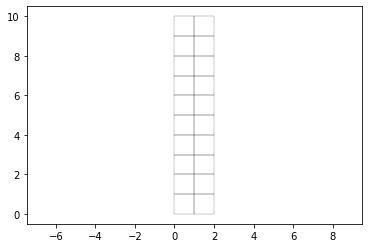

In [5]:
plot_model_mesh()

In [6]:
fix_nodes_rec('x', 0, [1, 2], 0.001)
force_dist_rec('x', 5, 100 * tonf, [1], 0.001)

/content/FEM_funciones_aux.py:368: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vector = np.vstack((dic_vector.values()))


In [7]:
genBC_2D(lim=0.001)

<p> Se ensamblan las matrices de <mark>rigidez y masa</mark>, así mismo se genera el vector de fuerzas</p>

In [8]:
AssembleMatrix('MatrizK')
AssembleMatrix('MasaConcentrada')
AssembleVector("VectorF")

<p>Se aplican las condiciones de borde,  <mark>Dirichlet</mark> (desplazamientos) y <mark>Neumann</mark> (fuerzas).

In [9]:
ApplyBC()

Dirichlet, DOF: 0
Dirichlet, DOF: 2
Dirichlet, DOF: 4
Dirichlet, DOF: 1
Dirichlet, DOF: 3
Dirichlet, DOF: 5
Neumann, DOF: 30
Neumann, DOF: 32
Neumann, DOF: 34


<p>Se realiza el análisis Estático con la función <mark>Analysis()</mark>.

In [10]:
Analysis()

<p>Se plotea la deformada de la estructura y se indica a traves a traves de la barra de colores el desplazamiento en cada uno de sus nodos en la <mark>dirección X</mark> </p>

33


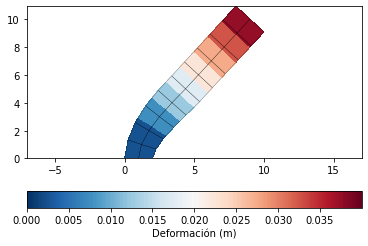

In [11]:
plot_model_deformada('x', 200)

<p>Se plotea la deformada de la estructura y se indica a traves a traves de la barra de colores el desplazamiento en cada uno de sus nodos en la <mark>dirección Y</mark> </p>

33


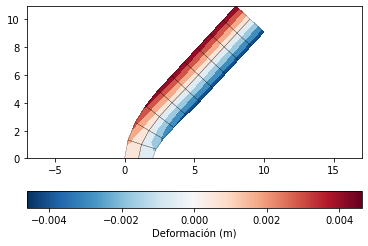

In [12]:
plot_model_deformada('y', 200)